Equilibrium Points and Stability:
x* = 0.1000, Stability: Stable, |f_x + f_y| = 0.4524
x* = 2.0000, Stability: Stable, |f_x + f_y| = 0.0677


/var/folders/x3/jh_7mg9d1sx0rl54wqhg5gr00000gn/T/ipykernel_53875/4104026478.py:19: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  equilibrium_points = fsolve(equilibrium_equation, initial_guess)


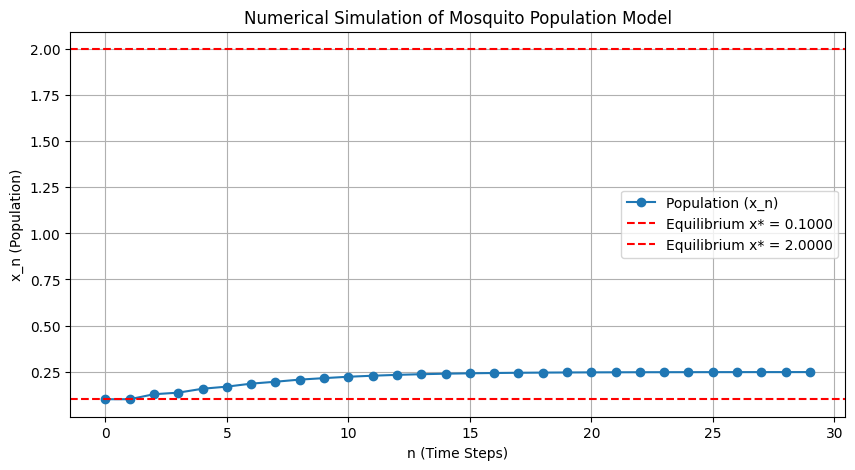

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
a = 0.5  # a in (0, 1)
b = 1.0  # b in [0, +infinity)

# Define the model function
def mosquito_model(xn, xn_minus1):
    return (a * xn + b * xn_minus1 * np.exp(-xn_minus1)) * np.exp(-xn)

# Step 1: Find equilibrium points numerically
def equilibrium_equation(x):
    return (a + b * np.exp(-x)) * np.exp(-x) - 1

# Find numerical solutions for equilibrium points (approximation)
initial_guess = [0.1, 2.0]
equilibrium_points = fsolve(equilibrium_equation, initial_guess)
equilibrium_points = [p for p in equilibrium_points if p > 0]  # Only real, positive equilibria

# Step 2: Stability Analysis at Equilibrium Points
def stability_at_equilibrium(x_star):
    # Derivatives at equilibrium
    f_x = -a * np.exp(-x_star) - b * np.exp(-2 * x_star)
    f_y = b * np.exp(-2 * x_star)

    # Sum of partial derivatives to check stability
    stability_measure = abs(f_x + f_y)
    stability_status = "Stable" if stability_measure < 1 else "Unstable"
    return stability_status, stability_measure

# Display equilibrium points and their stability
print("Equilibrium Points and Stability:")
for point in equilibrium_points:
    stability_status, stability_measure = stability_at_equilibrium(point)
    print(f"x* = {point:.4f}, Stability: {stability_status}, |f_x + f_y| = {stability_measure:.4f}")

# Step 3: Numerical Simulation
iterations = 30
x_vals = np.zeros(iterations)
x_vals[0] = 0.1  # Initial condition x_0
x_vals[1] = 0.1  # Initial condition x_1

# Iterate the mosquito model
for n in range(2, iterations):
    x_vals[n] = mosquito_model(x_vals[n - 1], x_vals[n - 2])

# Plotting the results of the simulation
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), x_vals, marker='o', label='Population (x_n)')
for point in equilibrium_points:
    plt.axhline(point, color='red', linestyle='--', label=f'Equilibrium x* = {point:.4f}')
plt.title("Numerical Simulation of Mosquito Population Model")
plt.xlabel("n (Time Steps)")
plt.ylabel("x_n (Population)")
plt.legend()
plt.grid(True)
plt.show()
